In [1]:
import sys
sys.path.append('../')
from mpasanalysis import *
from e3sm_simulations import *
%matplotlib inline

In [2]:
# get paths of restart files, monthly mean output files, processed climatology files and output figures
ts_yr0 = 1
ts_yr1 = 2
plt_yr0 = 1
plt_yr1 = 2
rest_yr = 26
run = E3SMSimulation(database='../e3sm_simulations.xml', runname='test-low-res')
data_root = run.get_path(comp='ocn', climo_yr0=ts_yr0, climo_yr1=ts_yr1,
                         ts_yr0=ts_yr0, ts_yr1=ts_yr1, rest_yr=rest_yr)
rst_root = data_root['rst_root']
mon_root = data_root['mon_root']
fig_root = data_root['fig_root']
rst_file = rst_root+'/mpaso.rst.{:04d}-01-01_00000.nc'.format(rest_yr)

In [3]:
# load dataset
mpasmesh = MPASMesh(filepath=rst_file)
mpasdata = MPASOData(filepath=rst_file, filepath_mesh=rst_file)

### Test 1: Get path between two end points 

#### Step 1: Show the path 

Endpoints:
    P0: 304.5 53.5
    P1: 312.0 61.0
    P2: 321.0 51.0
Vertex closest to P0: 312.08908 60.99671
Vertex closest to P1: 304.58613 53.44701
 - Vertex closest to RefP1: 310.49792 59.84672
 - Vertex closest to RefP2: 309.43468 58.46836
 - Vertex closest to RefP3: 307.83648 57.23957
 - Vertex closest to RefP4: 306.75188 56.12108
 - Vertex closest to RefP5: 305.64650 54.63632
Vertex closest to P0: 321.28230 50.81306
Vertex closest to P1: 312.08908 60.99671
 - Vertex closest to RefP1: 319.90170 52.51468
 - Vertex closest to RefP2: 318.66954 53.97944
 - Vertex closest to RefP3: 317.15979 56.12552
 - Vertex closest to RefP4: 315.99555 57.52819
 - Vertex closest to RefP5: 314.15851 59.30576
Vertex closest to P0: 321.28230 50.81306
Vertex closest to P1: 304.58613 53.44701
 - Vertex closest to RefP1: 318.59680 51.63052
 - Vertex closest to RefP2: 316.02654 51.86489
 - Vertex closest to RefP3: 313.12535 52.57170
 - Vertex closest to RefP4: 310.43543 52.73025
 - Vertex closest to RefP5: 

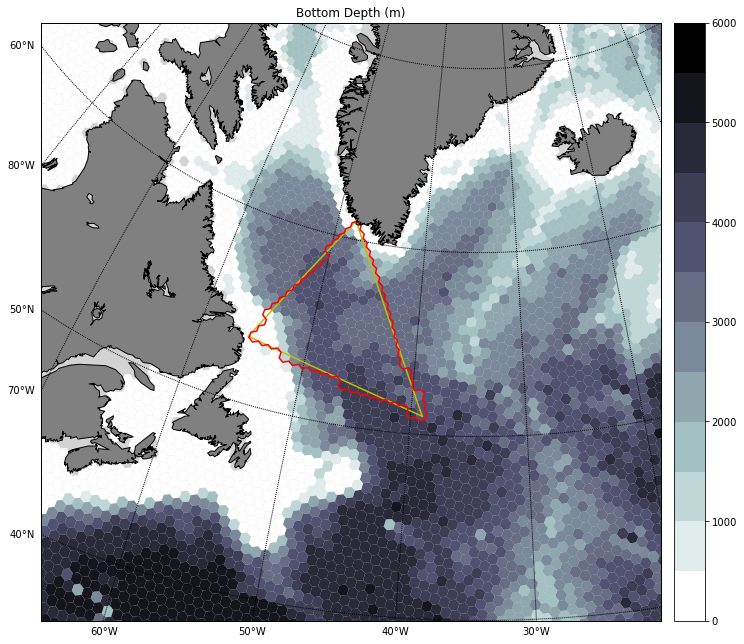

In [4]:
# set endpoints
lon_p0, lat_p0 = 304.5, 53.5
lon_p1, lat_p1 = 312, 61
lon_p2, lat_p2 = 321, 51
print('Endpoints:')
print('    P0: {:4.1f} {:4.1f}'.format(lon_p0, lat_p0))
print('    P1: {:4.1f} {:4.1f}'.format(lon_p1, lat_p1))
print('    P2: {:4.1f} {:4.1f}'.format(lon_p2, lat_p2))
# get the shortest path
path0 = mpasmesh.get_shortest_path(lon_p1, lat_p1, lon_p0, lat_p0, npoint_ref=5, debug_info=False) 
path1 = mpasmesh.get_shortest_path(lon_p2, lat_p2, lon_p1, lat_p1, npoint_ref=5, debug_info=False)
path2 = mpasmesh.get_shortest_path(lon_p2, lat_p2, lon_p0, lat_p0, npoint_ref=5, debug_info=False) 

fig = plt.figure(figsize=[12,11])
levels = np.linspace(0, 6000, 13)
out = mpasmesh.get_map('bottomDepth', name='Bottom Depth'). \
      plot(region='LabSea', ptype='pcolor', cmap='bone_r', levels=levels)
m = out[0]
# plot cross sections
m.drawgreatcircle(lon_p0, lat_p0, lon_p1, lat_p1, color='y')
m.drawgreatcircle(lon_p1, lat_p1, lon_p2, lat_p2, color='y')
m.drawgreatcircle(lon_p2, lat_p2, lon_p0, lat_p0, color='y')
# plot all edges
# mpasmesh.plot_edges(m, colors='lightgray')
# plot paths
path0.plot_edge(m, c='r')
path1.plot_edge(m, c='r')
path2.plot_edge(m, c='r')